In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
import compute_S_rate
import auxiliary_functions
import seaborn
import math

## Transition Matrices

### RW Diffusion

In [3]:
T_RW_ii = lambda t, n: 1/n + (n-1)/n*np.exp(- (n*t)/(n-1))
T_RW_ij = lambda t, n: 1/n - 1/n*np.exp(- (n*t)/(n-1))

In [4]:
N = 8
time = np.linspace(0.05, 5, 100)

complete_graph_adj = np.ones((N, N)) - np.diag(np.ones(N), 0)
complete_graph_RW = StaticTempNetwork(times=time, adjacency=csr_matrix(complete_graph_adj))
complete_graph_RW.compute_laplacian_matrices(random_walk=True)
complete_graph_RW.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
complete_graph_RW.compute_transition_matrices(lamda=1)

/compute/skoove/entropy/S_env/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/compute/skoove/entropy/S_env/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


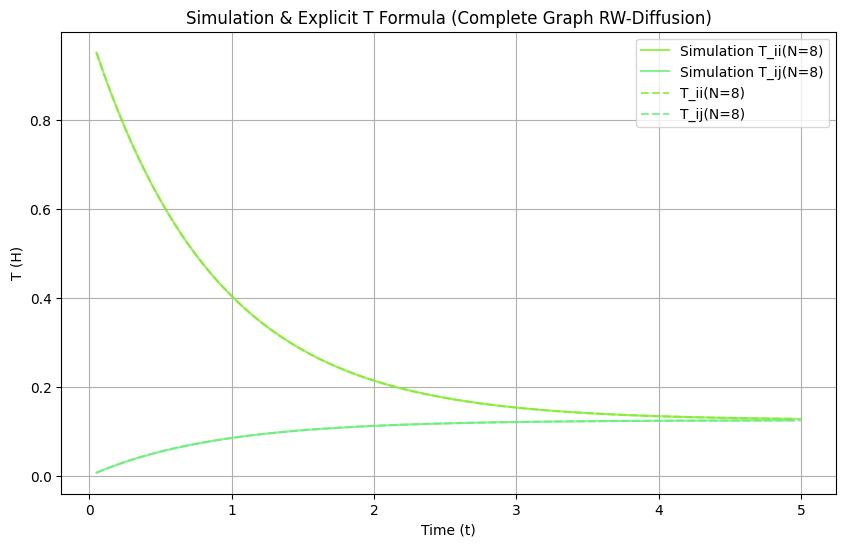

In [5]:
simulation_T_ii = [complete_graph_RW.T[1][i].toarray()[0,0] for i in range(len(time)-1)]
simulation_T_ij = [complete_graph_RW.T[1][i].toarray()[0,1] for i in range(len(time)-1)]

T_ii = [T_RW_ii(t, N) for t in time]
T_ij = [T_RW_ij(t, N) for t in time]


colours = auxiliary_functions.generate_random_colors(2)
# Initialize plot
plt.figure(figsize=(10, 6))

# Plot exact and approximate entropy
plt.plot(time[0:-1], simulation_T_ii, label=f"Simulation T_ii(N={N})", color=colours[0],  alpha=0.8)
plt.plot(time[0:-1], simulation_T_ij, label=f"Simulation T_ij(N={N})", color=colours[1],  alpha=0.8)

plt.plot(time, T_ii, label=f"T_ii(N={N})", color=colours[0], linestyle='--', alpha=0.8)
plt.plot(time, T_ij, label=f"T_ij(N={N})", color=colours[1], linestyle='--', alpha=0.8)

# Finalize plot
plt.xlabel("Time (t)")
plt.ylabel("T (H)")
plt.title("Simulation & Explicit T Formula (Complete Graph RW-Diffusion)")
plt.legend()
plt.grid()
#plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_completegraph.png', format='png', dpi=300)
plt.show()

### Heat diffusion

In [6]:
T_Heat_ii = lambda t, n: 1/n + (n-1)/n*np.exp(-(n*t))
T_Heat_ij = lambda t, n: 1/n - 1/n*np.exp(-(n*t))

In [10]:
N = 50
time = np.linspace(0.05, 0.1, 100)

complete_graph_adj = np.ones((N, N)) - np.diag(np.ones(N), 0)
complete_graph_Heat = StaticTempNetwork(times=time, adjacency=csr_matrix(complete_graph_adj))
complete_graph_Heat.compute_laplacian_matrices(random_walk=False)
complete_graph_Heat.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
complete_graph_Heat.compute_transition_matrices(lamda=1)

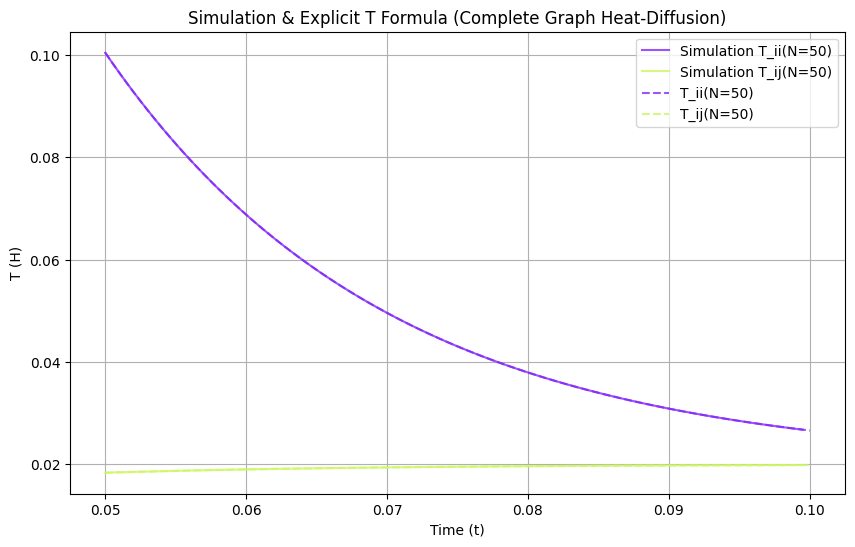

In [11]:
simulation_T_ii = [complete_graph_Heat.T[1][i].toarray()[0,0] for i in range(len(time)-1)]
simulation_T_ij = [complete_graph_Heat.T[1][i].toarray()[0,1] for i in range(len(time)-1)]

T_ii = [T_Heat_ii(t, N) for t in time]
T_ij = [T_Heat_ij(t, N) for t in time]


colours = auxiliary_functions.generate_random_colors(2)
# Initialize plot
plt.figure(figsize=(10, 6))

# Plot exact and approximate entropy
#plt.plot(time[:-1], exact_entropy[list(exact_entropy.keys())[0]][1:], color=colours[i], label=f"Exact (N={N})", linestyle='-', alpha=0.8)
plt.plot(time[:-1], simulation_T_ii, label=f"Simulation T_ii(N={N})", color=colours[0],  alpha=0.8)
plt.plot(time[:-1], simulation_T_ij, label=f"Simulation T_ij(N={N})", color=colours[1],  alpha=0.8)

plt.plot(time, T_ii, label=f"T_ii(N={N})", color=colours[0], linestyle='--', alpha=0.8)
plt.plot(time, T_ij, label=f"T_ij(N={N})", color=colours[1], linestyle='--', alpha=0.8)

# Finalize plot
plt.xlabel("Time (t)")
plt.ylabel("T (H)")
plt.title("Simulation & Explicit T Formula (Complete Graph Heat-Diffusion)")
plt.legend()
plt.grid()
#plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_completegraph.png', format='png', dpi=300)
plt.show()

## Entropy

### RW Diffusion

In [12]:
# Closed Formula CT-RW
H_RW = lambda t, n: np.log(n) - (n-1)/n*np.exp(-(n*t)/(n-1))*np.log((1+(n-1)*np.exp(-(n*t)/(n-1))) / (1-np.exp(- (n*t)/(n-1)))) - (n-1)/n * np.log(1-np.exp(-(n*t)/(n-1))) - 1/n*np.log(1+ (n-1)*np.exp((-n*t)/(n-1)))

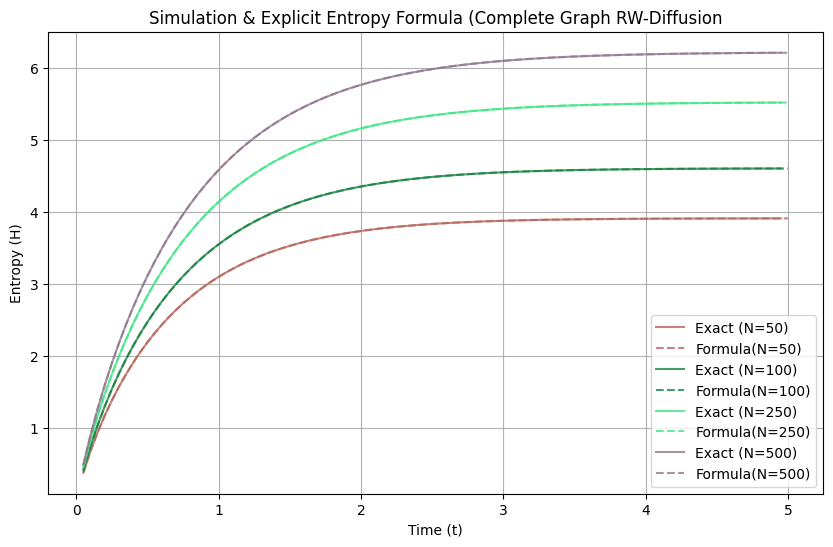

In [13]:
# Define parameters
N_values = [50, 100, 250, 500]
lambda_value = 1.0
time = np.linspace(0.05, 5, 100)

colours = auxiliary_functions.generate_random_colors(len(N_values))
# Initialize plot
plt.figure(figsize=(10, 6))

# Loop over different network sizes
for i, N in enumerate(N_values):
    # Compute approximate entropy
    formula_entropy = [H_RW(t, N) for t in time]

    #Placeholder for exact entropy computation
    #Replace this with your actual code to compute exact entropy
    complete_graph_adj = np.ones((N, N)) - np.diag(np.ones(N), 0)
    complete_graph_RW = StaticTempNetwork(times=time, adjacency=csr_matrix(complete_graph_adj))
    complete_graph_RW.compute_laplacian_matrices(random_walk=True)
    complete_graph_RW.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
    complete_graph_RW.compute_transition_matrices(lamda=1)
    exact_entropy = compute_S_rate.compute_conditional_entropy(net=complete_graph_RW, list_T=complete_graph_RW.T[1], lamda=1, force_csr=True, time_domain=list(np.arange(0, len(time) - 1)))

    # Plot exact and approximate entropy
    plt.plot(time[:-1], exact_entropy[list(exact_entropy.keys())[0]][1:], color=colours[i], label=f"Exact (N={N})", linestyle='-', alpha=0.8)
    plt.plot(time, formula_entropy, label=f"Formula(N={N})", color=colours[i], linestyle='--', alpha=0.8)

# Finalize plot
plt.xlabel("Time (t)")
plt.ylabel("Entropy (H)")
plt.title("Simulation & Explicit Entropy Formula (Complete Graph RW-Diffusion")
plt.legend()
plt.grid()
#plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_completegraph.png', format='png', dpi=300)
plt.show()

### Heat Diffusion

In [14]:
#Closed Formula Heat Diffussion
H_Heat = lambda t, n: np.log(n) - (n-1)/n*np.exp(-(n*t))*np.log((1+(n-1)*np.exp(-(n*t))) / (1-np.exp(-(n*t)))) - (n-1)/n * np.log(1-np.exp(-(n*t))) - 1/n*np.log(1+ (n-1)*np.exp((-n*t)))

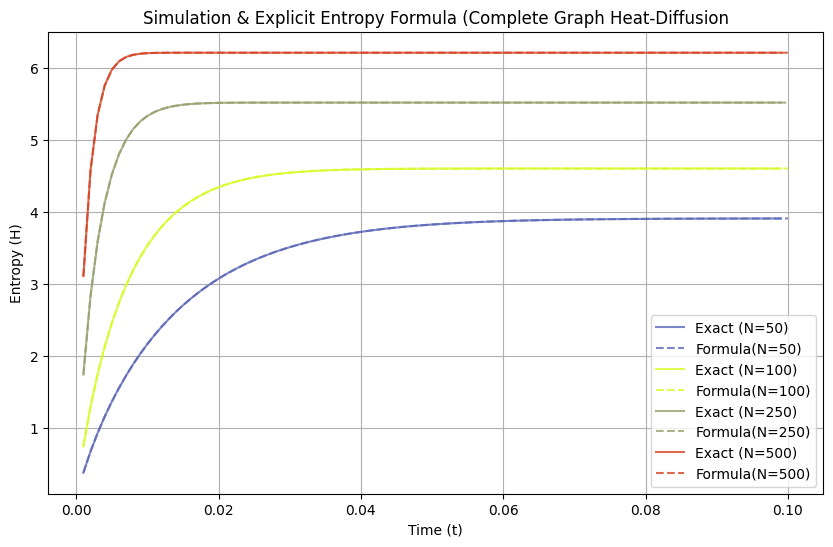

In [17]:
# Define parameters
N_values = [50, 100, 250, 500]
lambda_value = 1.0
time = np.linspace(0.001, 0.1, 100)

colours = auxiliary_functions.generate_random_colors(len(N_values))
# Initialize plot
plt.figure(figsize=(10, 6))

# Loop over different network sizes
for i, N in enumerate(N_values):
    # Compute approximate entropy
    formula_entropy = [H_Heat(t, N) for t in time]

    #Placeholder for exact entropy computation
    #Replace this with your actual code to compute exact entropy
    complete_graph_adj = np.ones((N, N)) - np.diag(np.ones(N), 0)
    complete_graph_Heat = StaticTempNetwork(times=time, adjacency=csr_matrix(complete_graph_adj))
    complete_graph_Heat.compute_laplacian_matrices(random_walk=False)
    complete_graph_Heat.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
    complete_graph_Heat.compute_transition_matrices(lamda=1)
    exact_entropy = compute_S_rate.compute_conditional_entropy(net=complete_graph_Heat, list_T=complete_graph_Heat.T[1], lamda=1, force_csr=True, time_domain=list(np.arange(0, len(time) - 1)))

    # Plot exact and approximate entropy
    plt.plot(time[:-1], exact_entropy[list(exact_entropy.keys())[0]][1:], color=colours[i], label=f"Exact (N={N})", linestyle='-', alpha=0.8)
    plt.plot(time, formula_entropy, label=f"Formula(N={N})", color=colours[i], linestyle='--', alpha=0.8)

# Finalize plot
plt.xlabel("Time (t)")
plt.ylabel("Entropy (H)")
plt.title("Simulation & Explicit Entropy Formula (Complete Graph Heat-Diffusion)")
plt.legend()
plt.grid()
#plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_completegraph.png', format='png', dpi=300)
plt.show()

## Approximation Formulas

### CRW Diffusion

In [ ]:
def compute_approximation_CTRW_entropy(N, t, lambda_value):
    """
    Computes the entropy H based on the given equation.

    Parameters:
        N (int): Number of nodes in the complete graph.
        t (float): Time.
        lambda_value (float): Decay rate parameter.

    Returns:
        float: The computed entropy H.
    """
    if N <= 0:
        raise ValueError("Number of nodes N must be greater than zero.")
    if t < 0:
        raise ValueError("Time t cannot be negative.")

    term1 = 1 - np.exp(-lambda_value * t)
    term2 = (1 / N) - (1 / N) * np.exp(-lambda_value * t)

    if term2 <= 0:
        raise ValueError("Logarithm argument must be positive. Check your inputs.")

    entropy = -term1 * np.log(term2)
    return entropy


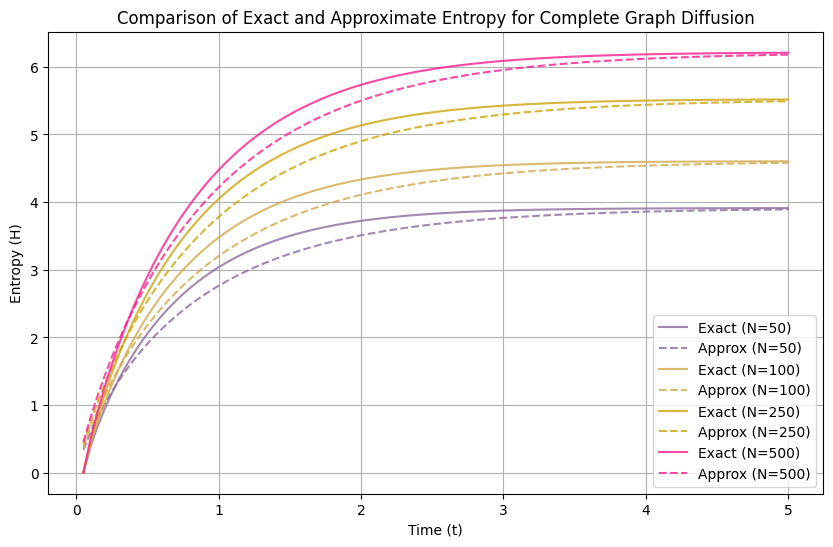

In [20]:
# Define parameters
N_values = [50, 100, 250, 500]
lambda_value = 1.0
time = np.linspace(0.05, 5, 100)

colours = auxiliary_functions.generate_random_colors(len(N_values))
# Initialize plot
plt.figure(figsize=(10, 6))

# Loop over different network sizes
for i, N in enumerate(N_values):
    # Compute approximate entropy
    approx_entropy = [compute_approximation_CTRW_entropy(N, t, lambda_value) for t in time]

    #Placeholder for exact entropy computation
    #Replace this with your actual code to compute exact entropy
    complete_graph_adj = np.ones((N, N)) - np.diag(np.ones(N), 0)
    complete_graph_RW = StaticTempNetwork(times=time, adjacency=csr_matrix(complete_graph_adj))
    complete_graph_RW.compute_laplacian_matrices(random_walk=True)
    complete_graph_RW.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
    complete_graph_RW.compute_transition_matrices(lamda=1)
    exact_entropy = compute_S_rate.compute_conditional_entropy(net=complete_graph_RW, list_T=complete_graph_RW.T[1], lamda=1, force_csr=True, time_domain=list(np.arange(0, len(time) - 1)))

    # Plot exact and approximate entropy
    plt.plot(time, exact_entropy[list(exact_entropy.keys())[0]], color=colours[i], label=f"Exact (N={N})", linestyle='-', alpha=0.8)
    plt.plot(time, approx_entropy, label=f"Approx (N={N})", color=colours[i], linestyle='--', alpha=0.8)

# Finalize plot
plt.xlabel("Time (t)")
plt.ylabel("Entropy (H)")
plt.title("Comparison of Exact and Approximate Entropy for Complete Graph Diffusion")
plt.legend()
plt.grid()
#plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_completegraph.png', format='png', dpi=300)
plt.show()

### Heat Diffusion

In [32]:
def compute_approximation_Heat_entropy(N, t, lambda_value):
    """
    Computes the entropy H based on the given equation.

    Parameters:
        N (int): Number of nodes in the complete graph.
        t (float): Time.
        lambda_value (float): Decay rate parameter.

    Returns:
        float: The computed entropy H.
    """
    if N <= 0:
        raise ValueError("Number of nodes N must be greater than zero.")
    if t < 0:
        raise ValueError("Time t cannot be negative.")

    term1 = 1 - np.exp(-N *lambda_value * t)
    term2 = (1 / N) - (1 / N) * np.exp(-N * lambda_value * t)

    if term2 <= 0:
        raise ValueError("Logarithm argument must be positive. Check your inputs.")

    entropy = -term1 * np.log(term2)
    return entropy

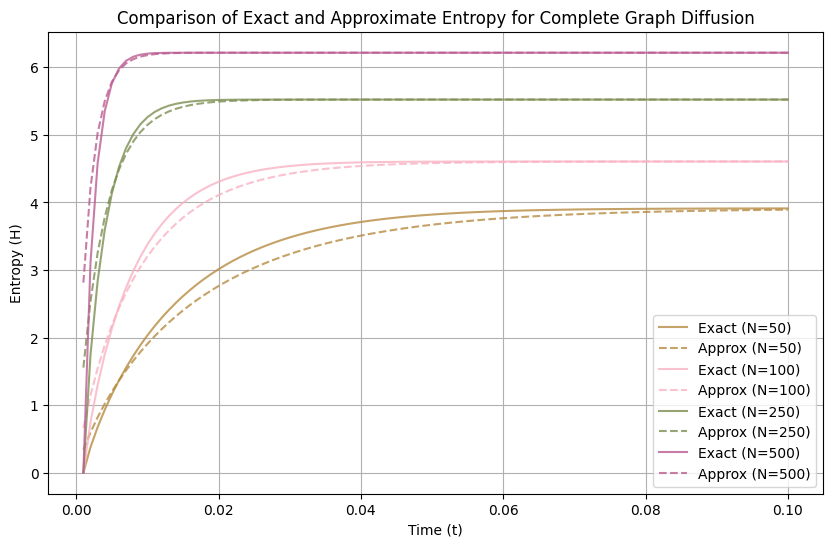

In [35]:
# Define parameters
N_values = [50, 100, 250, 500]
lambda_value = 1.0
time = np.linspace(0.001, 0.1, 100)

colours = auxiliary_functions.generate_random_colors(len(N_values))
# Initialize plot
plt.figure(figsize=(10, 6))

# Loop over different network sizes
for i, N in enumerate(N_values):
    # Compute approximate entropy
    approx_entropy = [compute_approximation_Heat_entropy(N, t, lambda_value) for t in time]

    #Placeholder for exact entropy computation
    #Replace this with your actual code to compute exact entropy
    complete_graph_adj = np.ones((N, N)) - np.diag(np.ones(N), 0)
    complete_graph_Heat = StaticTempNetwork(times=time, adjacency=csr_matrix(complete_graph_adj))
    complete_graph_Heat.compute_laplacian_matrices(random_walk=False)
    complete_graph_Heat.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
    complete_graph_Heat.compute_transition_matrices(lamda=1)
    exact_entropy = compute_S_rate.compute_conditional_entropy(net=complete_graph_Heat, list_T=complete_graph_Heat.T[1], lamda=1, force_csr=True, time_domain=list(np.arange(0, len(time) - 1)))

    # Plot exact and approximate entropy
    plt.plot(time, exact_entropy[list(exact_entropy.keys())[0]], color=colours[i], label=f"Exact (N={N})", linestyle='-', alpha=0.8)
    plt.plot(time, approx_entropy, label=f"Approx (N={N})", color=colours[i], linestyle='--', alpha=0.8)

# Finalize plot
plt.xlabel("Time (t)")
plt.ylabel("Entropy (H)")
plt.title("Comparison of Exact and Approximate Entropy for Complete Graph Diffusion")
plt.legend()
plt.grid()
#plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_completegraph.png', format='png', dpi=300)
plt.show()

## Asymptotic Value

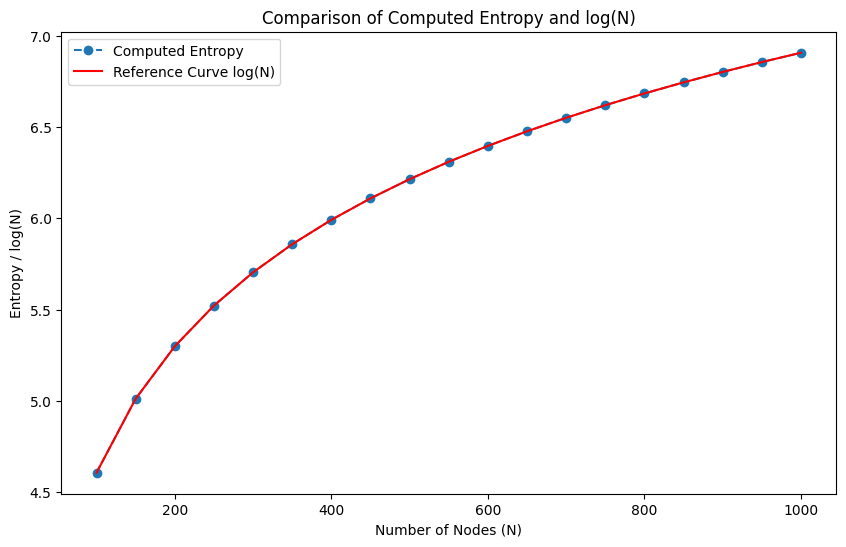

In [21]:
lamda = 1
N_values = np.arange(100, 1001, 50)
entropies = []
log_N_values = []

for N in N_values:
    t = 100 # t = 2 * 1 / log(N)
    entropy = compute_approximation_CTRW_entropy(N, t, lamda)
    entropies.append(entropy)
    log_N_values.append(np.log(N))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N_values, entropies, label="Computed Entropy", linestyle='--', marker='o')
plt.plot(N_values, log_N_values, label="Reference Curve log(N)", linestyle='-', color='r')
plt.xlabel("Number of Nodes (N)")
plt.ylabel("Entropy / log(N)")
plt.title("Comparison of Computed Entropy and log(N)")
plt.legend()
#plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_asymptot.png', format='png', dpi=300)
plt.show()